<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Other%20Courses/Assignments/Programming_Assigment_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment

This notebook contains all the Programming Assignments for the Course 1 of this specialization. 

Course 1 -> Getting Started with TensorFlow 

## CNN Classifier for the MNIST dataset

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D


In [2]:
# Load and preprocess the data 

mnist_data = tf.keras.datasets.mnist
(train_images , train_labels) , (test_images , test_labels) = mnist_data.load_data()

def scale_mnist_data(train_images , test_images):
  train_images = train_images / 255.
  test_images = test_images / 255.

  return (train_images , test_images)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Getting our scaled data 
scaled_train_images , scaled_test_images = scale_mnist_data(train_images , test_images)


In [4]:
# Add a dummy channel dimension 

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

scaled_train_images.shape , scaled_test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# A function to create the model 
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = tf.keras.Sequential([
        Conv2D(64 , 3 , activation = 'relu' , input_shape = input_shape ,
              padding = 'SAME') , 
        MaxPooling2D(2), 
        Flatten(), 
        Dense(64 , activation = 'relu') , 
        Dense(63 , activation = 'relu'), 
        Dense(10 , activation = 'softmax')
    ])
    
    return model

In [6]:
# Using the function to our model 

model = get_model(scaled_train_images[0].shape)

# Summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dense_1 (Dense)              (None, 63)                4095      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                640       
Total params: 808,255
Trainable params: 808,255
Non-trainable params: 0
__________________________________________________

In [7]:
# Compiling our model 

def compile_model(model):
  return model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                       optimizer = tf.keras.optimizers.Adam() , 
                       metrics = ['accuracy'])

In [8]:
# Run the function to compile the model 
compile_model(model)

In [9]:
# Fit the model to the training data 

history = model.fit(scaled_train_images , train_labels , 
                    epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3354 - accuracy: 0.8970
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0571 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0394 - accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0161 - accuracy: 0.9950


Plotting the loss curves 

- Epoch vs Accuracy 
- Epoch vs Loss 

In [10]:
# Creating a dataframe of our model's history 
frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

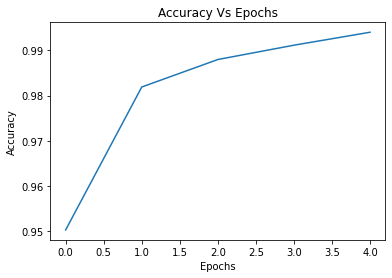

In [11]:
# Plotting Accuracy Vs Epochs 

acc_plot = frame.plot(y='accuracy' , 
                      title = 'Accuracy Vs Epochs' , 
                      legend= False)
acc_plot.set(xlabel = 'Epochs' , 
             ylabel = 'Accuracy')


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

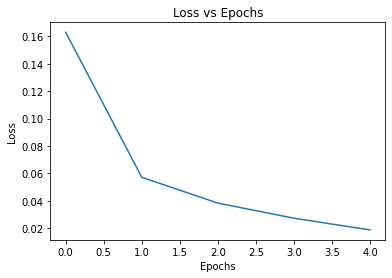

In [12]:
# Plotting Loss Vs Epochs plot 
loss_plot = frame.plot(y = 'loss' , title = 'Loss vs Epochs', 
                       legend = False)
loss_plot.set(xlabel = 'Epochs' , ylabel = 'Loss')

In [13]:
# Evaluating the model on test data 

test_loss , test_accuracy = model.evaluate(scaled_test_images , test_labels)


313/313 [==============================] - 2s 7ms/step - loss: 0.0528 - accuracy: 0.9840


In [14]:
# Printing the loss and accuracy on test data 
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.05279957130551338
Test Accuracy: 0.984000027179718


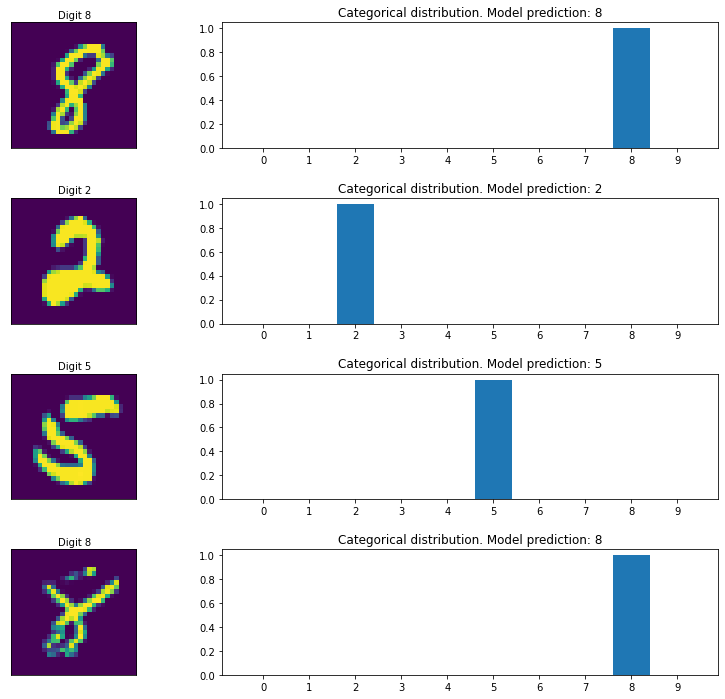

In [15]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

## Model Validation on the Iris dataset

In [1]:
# Importing the packages we need 

import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets , model_selection 
%matplotlib inline

# Setting the seed
from numpy.random import seed
seed(42)

#### Load and preprocess the data 

- Read the dataset
- Split into train and test sets 

In [6]:
from sklearn.datasets import load_iris
iris_data = load_iris()

col_names = iris_data['feature_names'] 
targ_names = iris_data['target_names']
col_names , targ_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [11]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# Creating a function for it 

def read_in_and_split_data(iris_data):
  '''
  Takes in a sklearn.datasets and then split into train and test sets 

  Function should return a tuple (train_data , test_data , train_targets , test_targets)
  '''

  data = iris_data['data']
  targets = iris_data['target']

  # Splitting into train and test split 
  train_data , test_data , train_targets , test_targets = model_selection.train_test_split(data , 
                                                                                           targets , 
                                                                                           test_size = 0.2 ,
                                                                                           random_state = 42)
  return (train_data , test_data , train_targets , test_targets) 

In [15]:
# Running the function to generate our splits of data 

train_data , test_data , train_targets , test_targets = read_in_and_split_data(iris_data)

In [16]:
# Checking the shape 

train_data.shape , test_data.shape , train_targets.shape, test_targets.shape  

((120, 4), (30, 4), (120,), (30,))

In [17]:
# Convert targst to a one-hot encoding 

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

train_targets[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

#### Build a neural network model 

In [18]:
# Importing the needed things 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential


In [21]:
# Creating a function to build a model 

def get_model(input_shape):
  '''
  Function builds a Sequential model. Ensure weights are initialized by providing
  the input_shape argument in the first layer. 

  Function should return the model
  '''

  model = Sequential([
    Dense(64 , activation = 'relu' ,kernel_initializer= 'he_uniform', 
          bias_initializer = tf.keras.initializers.Ones(), input_shape = input_shape), 
    Dense(64 , activation= 'relu') , 
    Dense(64 , activation= 'relu') , 
    Dense(64 , activation= 'relu') , 
    Dense(64 , activation= 'relu') , 
    Dense(128 , activation= 'relu') ,
    Dense(128 , activation= 'relu') ,
    Dense(128 , activation= 'relu') ,
    Dense(128 , activation= 'relu') ,
    Dense(3 , activation='softmax')
  ])

  return model 

In [22]:
# Getting our model from the function 
model = get_model(train_data[0].shape)

In [23]:
# Getting the sumary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1

In [24]:
# Function for compiling our model 

def compile_model(model):
  '''
  optimizer --> adam (lr = 0.0001)
  loss func --> categorical crossentropy
  metric --> accuracy 
  '''

  model.compile(loss = tf.keras.losses.CategoricalCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001) , 
                metrics = ['accuracy'])

In [25]:
# Run the function to compile our model 
compile_model(model)

#### Fit the model to the training data 
- batch size 40 
- validation split 15% 
- history should be stored 

In [31]:
def train_model(model, train_data , train_targets , epochs , 
                batch_size):

  history = model.fit(train_data , train_targets , epochs ,
                      batch_size ,  
                      validation_split = 0.15 , 
                      verbose = False)
  
  return history

In [32]:
# Training the model 
history = train_model(model , train_data , train_targets , 
                      epochs = 800 , batch_size = 40 )

In [34]:
# Evaluating the model on test data 
norm_model_results = model.evaluate(test_data , test_targets , verbose = 2)

1/1 - 0s - loss: 0.6821 - accuracy: 0.8667


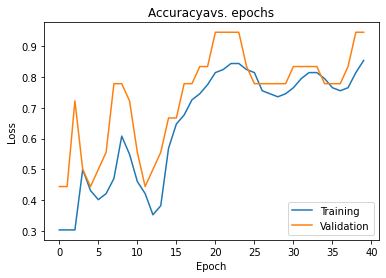

In [35]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracyavs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

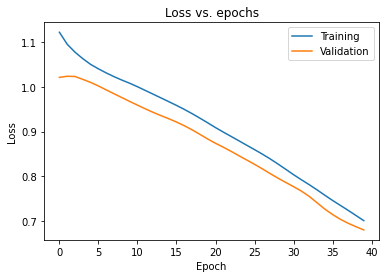

In [37]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh bad... Our model is overfitting. 

Our next goal is to reduce the overfitting in the model. 

Let's build a regularized model and see if we can avoid the overfitting.

In [39]:
# Importing the things we need 
from tensorflow.keras.layers import Dropout , BatchNormalization

In [44]:
def get_regularized_model(input_shape , dropout_rate , 
                          weight_decay):
  
  model = Sequential([
    Dense(64 , activation = 'relu' ,
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay),input_shape = input_shape), 

    Dense(128 , activation= 'relu' , kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) ,
    Dense(128 , activation= 'relu' , 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) ,
    Dropout(dropout_rate), 
    Dense(128 , activation= 'relu' , 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) ,
    Dense(128 , activation= 'relu' , 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) , 
    BatchNormalization(),     
    Dense(64 , activation= 'relu' , 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) , 
    Dense(64 , activation= 'relu' , 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) , 
    Dropout(dropout_rate),
    Dense(64 , activation= 'relu', 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) , 
    Dense(64 , activation= 'relu', 
          kernel_regularizer= tf.keras.regularizers.l2(weight_decay)) ,
    Dense(3 , activation='softmax')
  ])

  return model 

# Getting the model 
reg_model = get_regularized_model(train_data[0].shape , 0.3 , 0.001)

# Compiling the model 
compile_model(reg_model)

# Summary of the model 
reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_32 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

In [46]:
# Fitting the model 

reg_history = train_model(reg_model , train_data ,
                          train_targets , epochs = 800 , 
                          batch_size = 100)

In [47]:
# Evaluating on the test data 
reg_model_results = reg_model.evaluate(test_data , test_targets)

1/1 [==============================] - 0s 18ms/step - loss: 1.4926 - accuracy: 0.7333


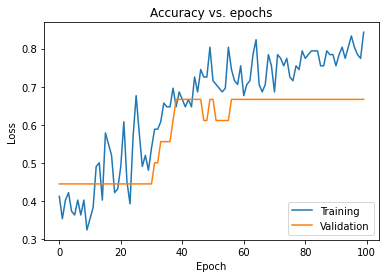

In [48]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

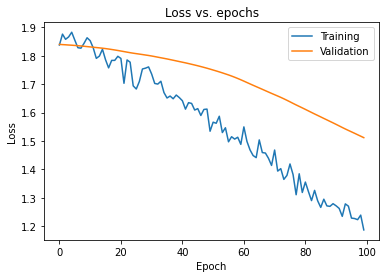

In [49]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Hmm.. not bad we reduced the overfitting a bit. Let's try addin some callbacks into our model and see if they can help us in any way. 

In [52]:
# Creating a function for callbacks 

def get_callbacks():
  '''
  Returns a tuple of (earlystopping , reducelronplateau)
  '''

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , 
                                                    patience = 30 , 
                                                    mode = 'min')
  
  reducelr_plateau = tf.keras.callbacks.ReduceLROnPlateau(factor= 0.2 , 
                                                          patience = 20)
  
  return (early_stopping , reducelr_plateau)



In [51]:
# Creating a model for testing callbacks 
call_model = get_regularized_model(train_data[0].shape , 
                                   0.3 , 0.001)

# Compiling the callback model 
compile_model(call_model)

# Summary of the model 
call_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

In [55]:
# Unpacking our callbacks 

early_stopping , learning_rate_reduction = get_callbacks()

# Fitting our model 
call_history = call_model.fit(train_data , train_targets, 
                              epochs = 800 , 
                              validation_split = 0.15 , 
                              callbacks = [early_stopping , learning_rate_reduction] , 
                              verbose = 0)

In [56]:
# Evaluating our model on test data 
call_model_results = call_model.evaluate(test_data , test_targets)

1/1 [==============================] - 0s 20ms/step - loss: 0.5570 - accuracy: 1.0000


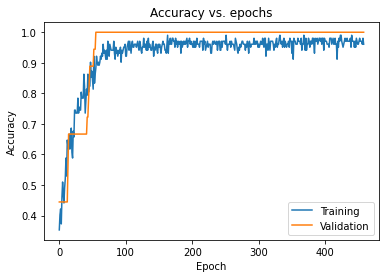

In [57]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

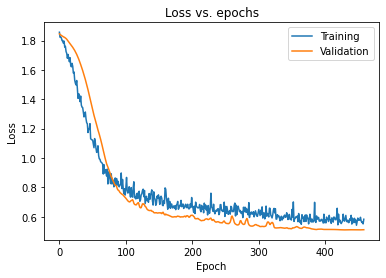

In [58]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [59]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.557
Test accuracy: 100.00%


Look at that!!! How impressive? Just using our regularization techniques we we're able to reduce our overfitting and get good results! 